In [ ]:
from google.colab import files
uploaded = files.upload()


Saving WildBlueberryPollinationSimulationData.csv to WildBlueberryPollinationSimulationData.csv


In [21]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold


df = pd.read_csv(io.BytesIO(uploaded['WildBlueberryPollinationSimulationData.csv']))

In [ ]:
df.head(5)


,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [ ]:
df.isnull().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [ ]:
duplicates = print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
772    False
773    False
774    False
775    False
776    False
Length: 777, dtype: bool


In [ ]:
total_duplicates = df.duplicated().sum()

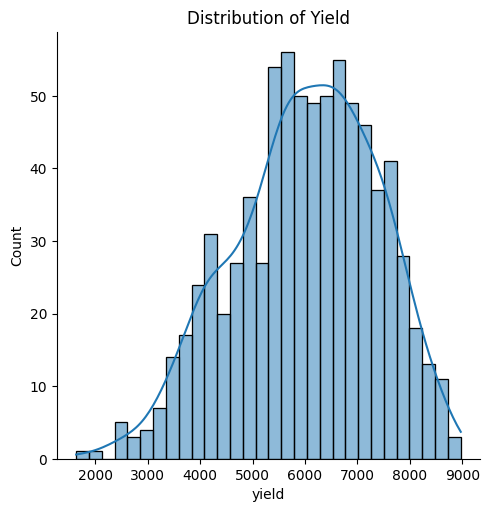

In [ ]:
sns.displot(df['yield'], kde=True, bins=30)
plt.title("Distribution of Yield")
plt.show()

In [14]:
column_types = df.dtypes

# Print the result
print(column_types)

Row#                      int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object


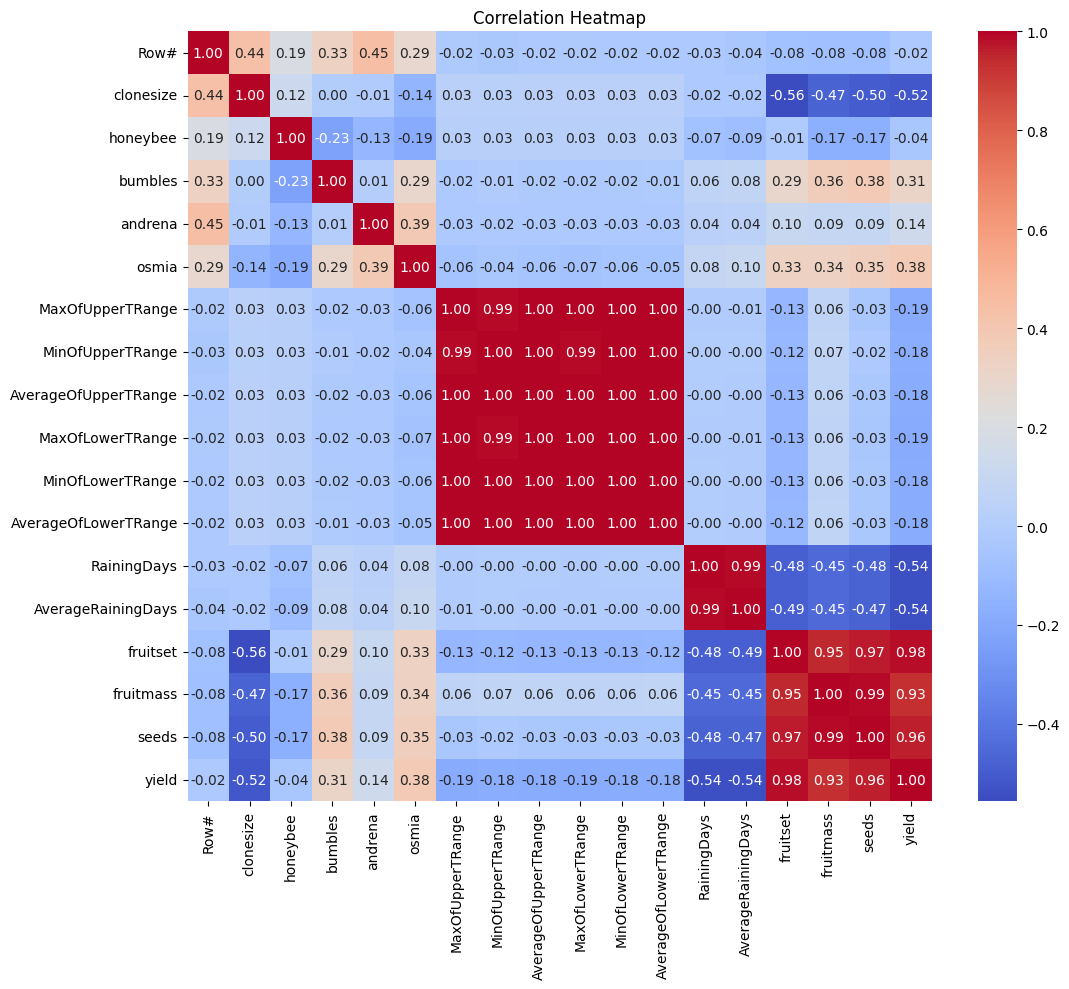

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

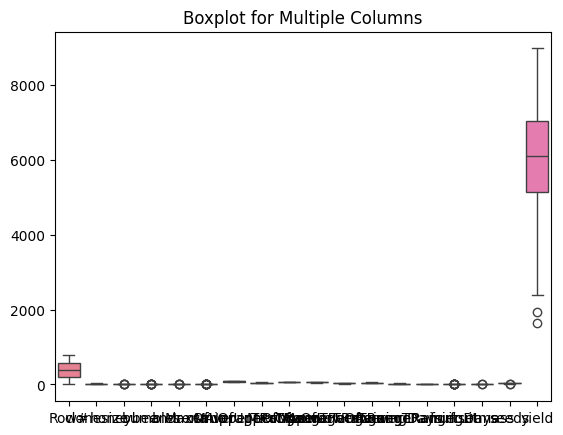

In [13]:
plt.figure(figsize=(10, 6)) #didnt understand how to make boxplot properly
sns.boxplot(data=df)
plt.title('Boxplot for Multiple Columns')
plt.show()

In [15]:
#i will drop columns using heatmap
df1 = df.drop(columns=[ 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageRainingDays','MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee', "fruitset", "fruitmass", "seeds"])
df1

,Row#,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,yield
0,0,37.5,0.250,0.250,0.250,71.9,50.8,3813.165795
1,1,37.5,0.250,0.250,0.250,71.9,50.8,4947.605663
2,2,37.5,0.250,0.250,0.250,79.0,55.9,3866.798965
3,3,37.5,0.250,0.250,0.250,79.0,55.9,4303.943030
4,4,37.5,0.250,0.250,0.250,71.9,50.8,3436.493543
...,...,...,...,...,...,...,...,...
772,772,10.0,0.117,0.409,0.058,71.9,50.8,5333.873335
773,773,40.0,0.117,0.409,0.058,71.9,50.8,3373.436842
774,774,20.0,0.117,0.409,0.058,71.9,50.8,4203.027624
775,775,20.0,0.117,0.409,0.058,65.6,45.3,4166.299735


In [16]:
X = df1.drop(columns=['yield'])
y = df1['yield']

In [17]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Row#                    388.00
clonesize                12.50
bumbles                   0.13
andrena                   0.25
osmia                     0.25
AverageOfUpperTRange      7.20
AverageOfLowerTRange      5.00
dtype: float64


In [18]:
data_iqr = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
data_iqr.shape

<ipython-input-18-bc05be8af0ca>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_iqr = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


(759, 8)

In [23]:
z = np.abs(stats.zscore(df1))
print(z)

         Row#  clonesize   bumbles   andrena     osmia  AverageOfUpperTRange  \
0    1.729823   2.678126  0.488512  1.359549  1.846405              0.414096   
1    1.725365   2.678126  0.488512  1.359549  1.846405              0.414096   
2    1.720906   2.678126  0.488512  1.359549  1.846405              1.339534   
3    1.716448   2.678126  0.488512  1.359549  1.846405              1.339534   
4    1.711990   2.678126  0.488512  1.359549  1.846405              0.414096   
..        ...        ...       ...       ...       ...                   ...   
772  1.711990   1.253503  2.494523  0.371655  2.982429              0.414096   
773  1.716448   3.035546  2.494523  0.371655  2.982429              0.414096   
774  1.720906   0.176180  2.494523  0.371655  2.982429              0.414096   
775  1.725365   0.176180  2.494523  0.371655  2.982429              0.407067   
776  1.729823   0.176180  2.494523  0.371655  2.982429              0.407067   

     AverageOfLowerTRange     yield  
0

In [24]:
df2 = df1.drop(columns=['Row#','andrena'])

In [32]:
X = df2.drop('yield', axis=1)
y = df2['yield']
scale= StandardScaler()
X = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_predlreg= lreg.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_predlreg))

In [34]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)
y_predxg= xgboost.predict(X_test)
rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_predxg))

In [36]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_predrf= rf.predict(X_test)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, y_predrf))

In [37]:
print("RMSE - Linear Regression:", rmse_linear)
print("RMSE - XGBoost:", rmse_xgboost)
print("RMSE - RandomForestRegressor:", rmse_random_forest)

RMSE - Linear Regression: 1029.54454377622
RMSE - XGBoost: 1017.4617756231677
RMSE - RandomForestRegressor: 1033.5486177183097


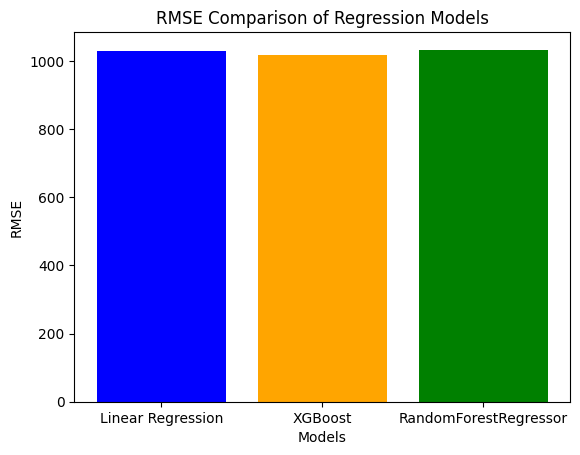

In [38]:
models = ['Linear Regression', 'XGBoost', 'RandomForestRegressor']
rmse_values = [rmse_linear, rmse_xgboost, rmse_random_forest]
plt.bar(models, rmse_values, color=['blue', 'orange', 'green'])
plt.title('RMSE Comparison of Regression Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()